In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib as mpl

Image 1 resolution is 1280x800


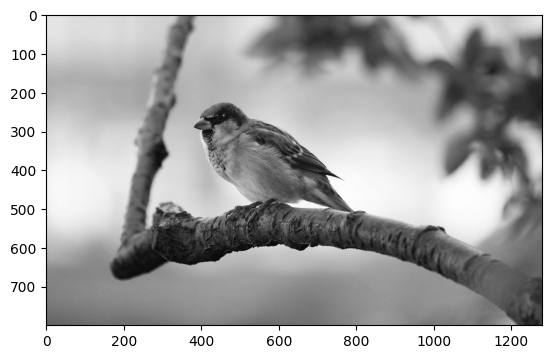

In [5]:
image_1 = cv2.imread('images4/bird-9950_1280.jpg')
image_1_height, image_1_width, image_1_color_channels = image_1.shape
print("Image 1 resolution is {}x{}".format(image_1_width, image_1_height))

image_1_grayscale = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
plt.imshow(image_1_grayscale, cmap = 'gray')
plt.show()

(12631.672847822665+1842.776862833816j)


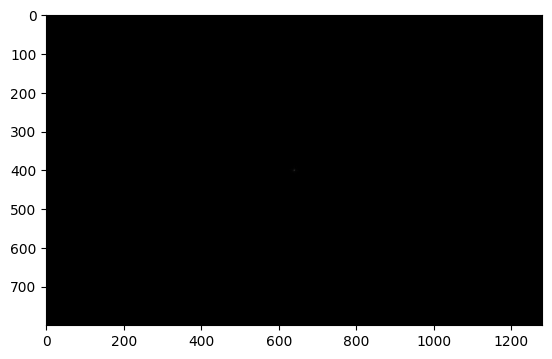

Min magnitude value:  7.92731836732415
Max magnitude value:  156013858.0


In [6]:
image_1_ft = np.fft.fft2(image_1_grayscale)

print(image_1_ft[136, 1148])

image_1_ft_shifted = np.fft.fftshift(image_1_ft)

image_1_magnitude_spectrum = np.abs(image_1_ft_shifted)
plt.imshow(image_1_magnitude_spectrum, cmap = 'gray')
plt.show()

print('Min magnitude value: ', np.min(image_1_magnitude_spectrum))
print('Max magnitude value: ', np.max(image_1_magnitude_spectrum))

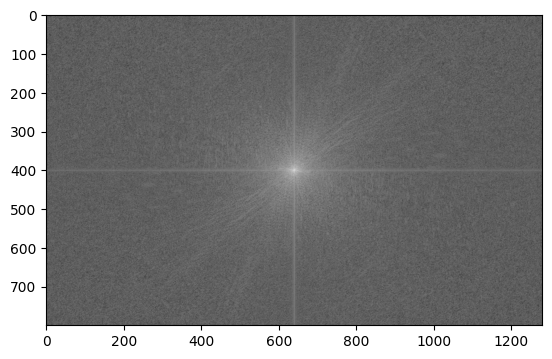

Difference between maximum and minimum values:  16.676339346033018


In [7]:
image_1_magnitude_spectrum = np.log(1+np.abs(image_1_ft_shifted))
plt.imshow(image_1_magnitude_spectrum, cmap = 'gray')
plt.show()

print('Difference between maximum and minimum values: ', np.max(image_1_magnitude_spectrum)-np.min(image_1_magnitude_spectrum))

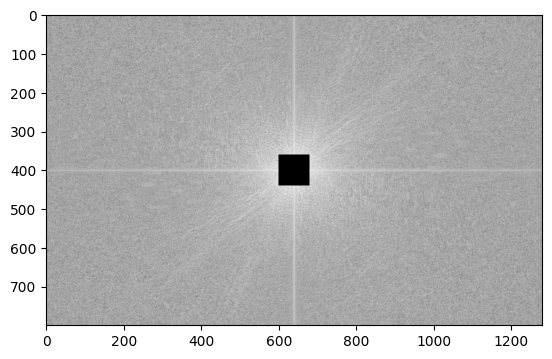

In [8]:
image_1_ft_shifted[int(image_1_height/2)-40 : int(image_1_height/2)+40, int(image_1_width/2)-40 : int(image_1_width/2)+40] = 0
image_1_magnitude_spectrum = np.log(1+np.abs(image_1_ft_shifted))
plt.imshow(image_1_magnitude_spectrum, cmap = 'gray')
plt.show()

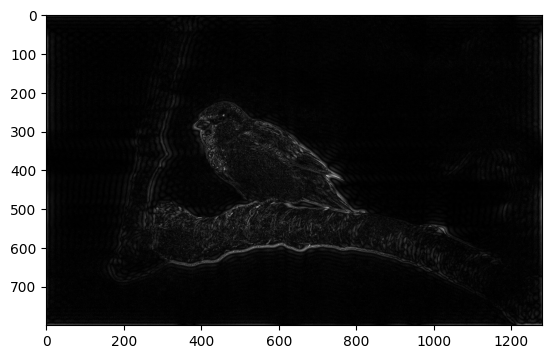

Magnitude value at row 677 and column 409 is: 1.7693057035102093


In [11]:
image_1_ift = np.fft.ifftshift(image_1_ft_shifted)
image_1_back = np.fft.ifft2(image_1_ift)
image_1_back = np.abs(image_1_back)
plt.imshow(image_1_back, cmap = 'gray')
plt.show()

print('Magnitude value at row 677 and column 409 is: {}'.format(image_1_back[677][409]))

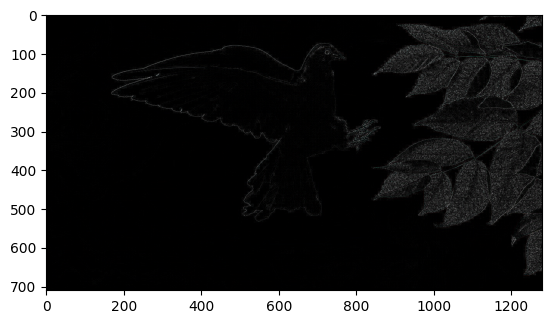

In [10]:
image_2 = cv2.imread('images4/dove-2516641_1280.jpg')
image_rgb = cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)

laplacian = cv2.Laplacian(image_rgb, -1)
plt.imshow(laplacian)

In [11]:
sum_intensity_laplacian = np.sum(laplacian)
print(f'Сумма интенсивностей всех пикселей по всеи трем каналам: {sum_intensity_laplacian}')

Сумма интенсивностей всех пикселей по всеи трем каналам: 17685654


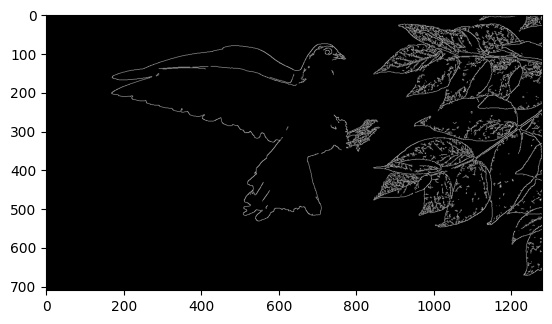

Sum of all edge's intensities is: 7040295


In [12]:
canny = cv2.Canny(image_2,100,200)
plt.imshow(canny, cmap = 'gray')
plt.show()

print("Sum of all edge's intensities is: {}".format(canny.sum()))